In [ ]:
# Import all required packages
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import re
import seaborn as sns
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector


## Preprocessing
- Load Data
- Review Data
    - Load Head of Data
    - Describe each Column of Data
    - Investigate missing values
    - Transform values in columns
    - Investigate data types
  
    



In [ ]:
# load data set Fifa 18
df = pd.read_excel('CompleteDataset.xlsx', header=0)
# get rid of index
df = df[df.columns.drop(list(df.filter(regex='Unnamed:')))]
# create copy for work
df_fifa = df
df_fifa.head()


,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,â‚¬95.5M,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,â‚¬105M,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,â‚¬123M,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. SuÃ¡rez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,â‚¬97M,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,â‚¬61M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In total 53002 fields are missing.
The missing values are the following:

Correlation Matrix with Weather Data for missing values


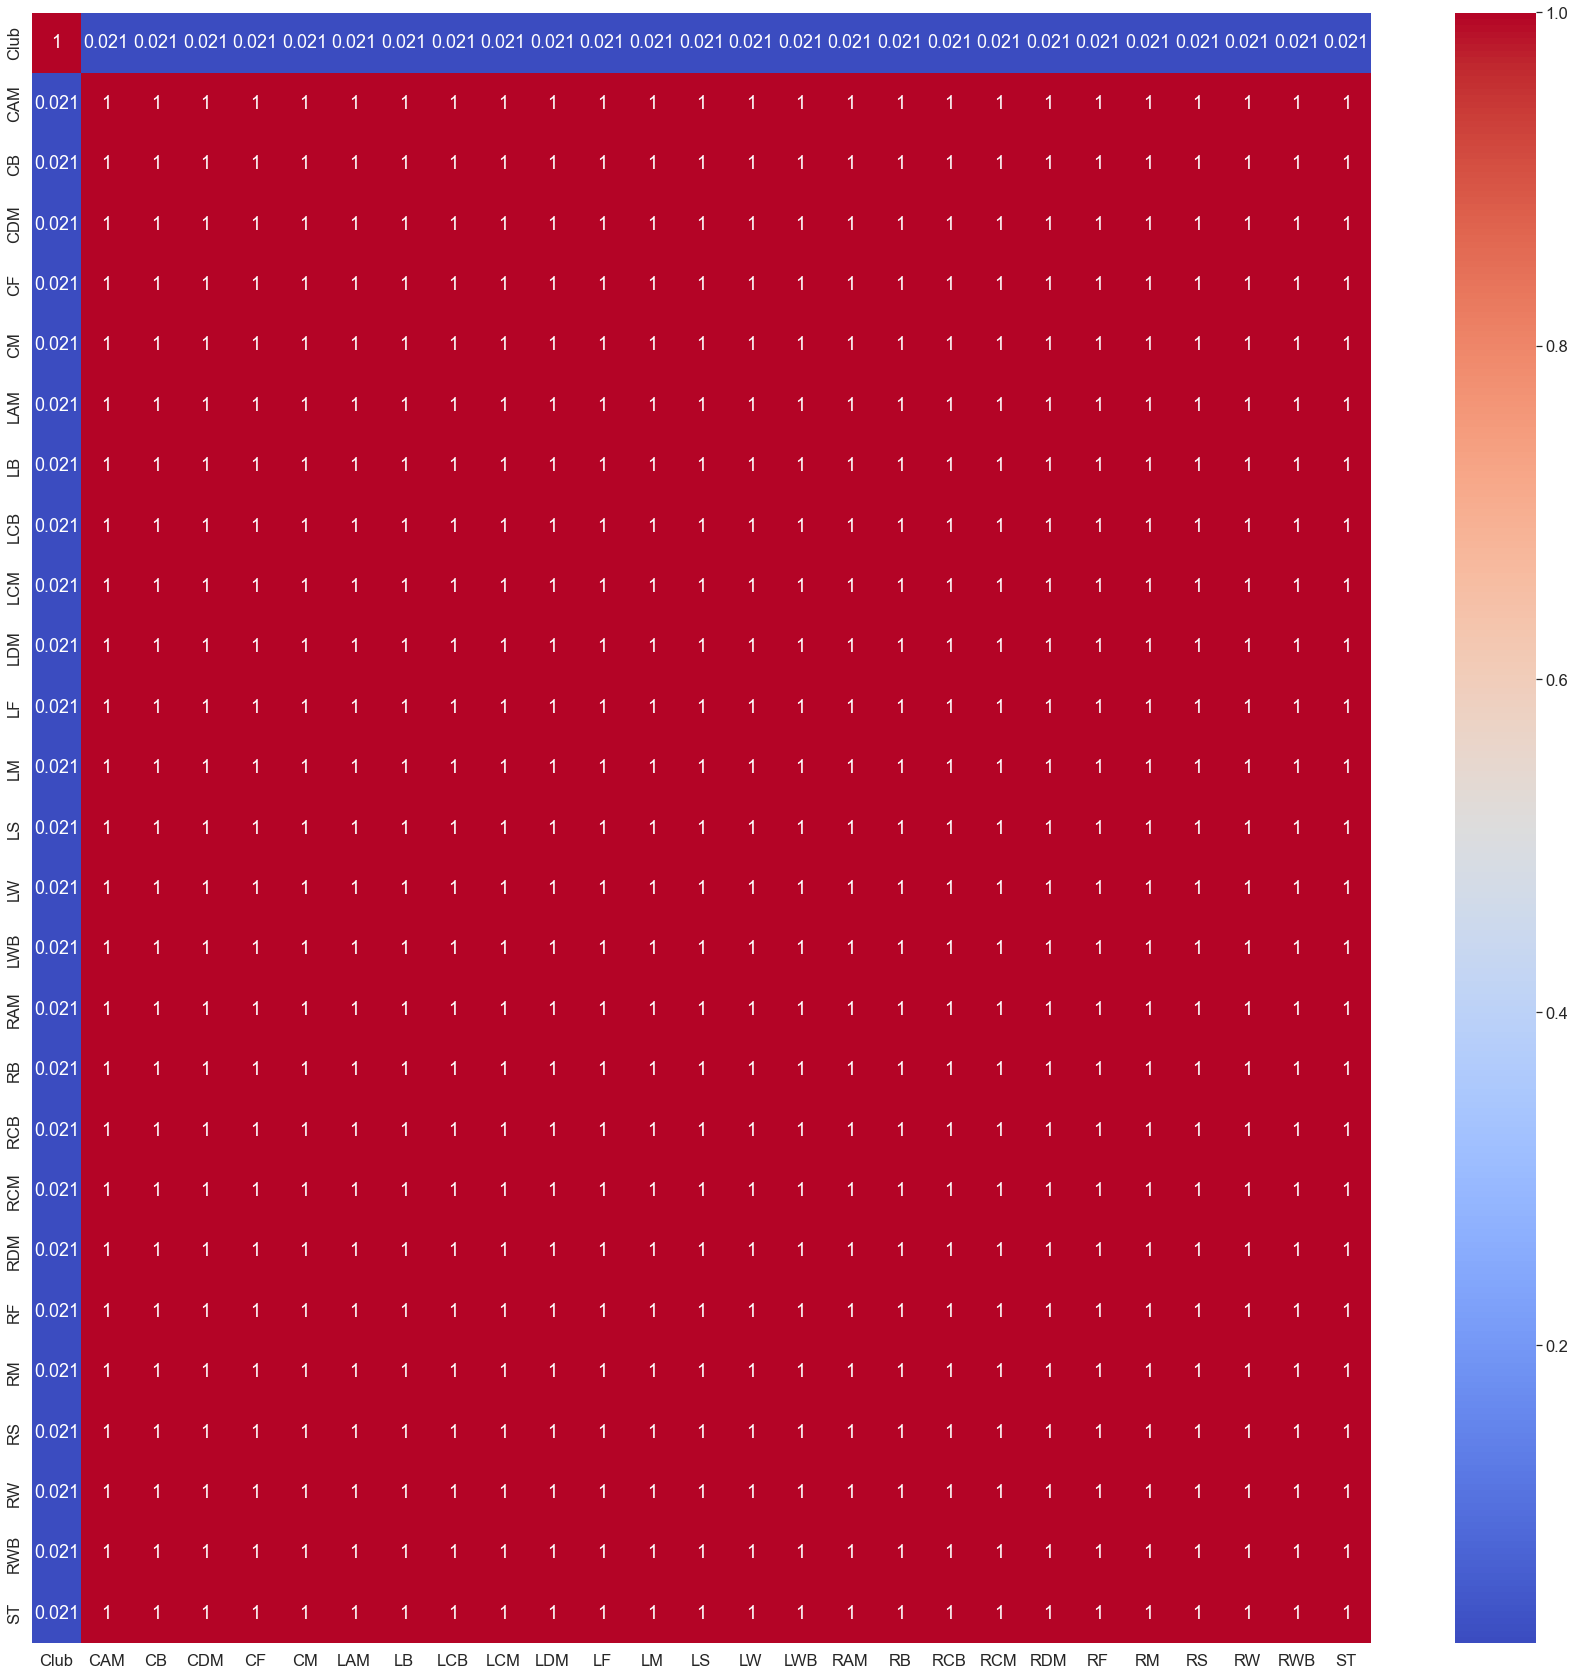

The Correlation Matrix for missing values shows that the player characteristics are all missing at once. In this case, imputing data wouldn`t make sense because we would only produces dummy instances. 2029 out of 17981 players have no information about their characteristics. So we will delete those.


In [ ]:
# first overview of columns, and missing values
df_fifa.describe()
#total_fields = df_fifa.sum().sum()
total_fields_missing = df_fifa.isnull().sum().sum()
print(f'In total {total_fields_missing} fields are missing.')
print("The missing values are the following:\n")
fields_missing_column = df_fifa.isnull().sum()
#fields_missing_column = fields_missing_column.loc[(fields_missing_column.T !=0).any()]
fields_missing_column
# list of columns with missing values
missing_columns = [col for col in df_fifa.columns if df_fifa[col].isnull().any()]
missing_columns
df_fifa[missing_columns]
# confusion matrix for zero values
sns.set(font_scale=1.5)
f,ax = plt.subplots(figsize=(30,30))
sns.heatmap(df_fifa[missing_columns].isnull().corr(), annot = True, fmt='.2g',cmap= 'coolwarm')
print('Correlation Matrix with Weather Data for missing values')
plt.show()
print(f'The Correlation Matrix for missing values shows that the player characteristics are all missing at once. In this case, imputing data wouldn`t make sense because we would only produces dummy instances. 2029 out of 17981 players have no information about their characteristics. So we will delete those.')
# remove rows containing missing values
df_fifa_cleaned = df_fifa
# remove na columns
df_fifa_cleaned.dropna(axis='columns', how='all', inplace=True)
# remove useless rows - all relevant columns are nan -> only three are enough because they are all correlated by 1
df_fifa_cleaned.dropna(axis='rows', how='all', subset=['CAM','CB','CDM'], inplace=True)


In [ ]:
## How to see which columns have math operations for maximum 
# error 60+6
error60_6 = df_fifa_cleaned[(df_fifa_cleaned == '60+6').any(axis=1)]
# datetime in Interceptions
# error_datetime = df_fifa_cleaned[df_fifa_cleaned['Interceptions'].str.contains('2019-10-11T00:00:00.000Z', na=False)]
m = df_fifa_cleaned[['Interceptions']].transform(pd.to_datetime, errors='coerce').isna().any(axis=1)   
error_datetime = df_fifa_cleaned[~m] # contains more than 1 value with datetime
# find row with index number and delete value. String contains didn't work. Not best way.
error_datetime = df_fifa_cleaned[df_fifa.index == 7898] 
df_fifa_cleaned = df_fifa_cleaned[df_fifa_cleaned.index != 7898]

# excute math operations to get max values of each category. 60+5 means 60 is given and +5 can be reached if player is in top form.
df_fifa_cleaned.Acceleration.unique()
df_fifa_cleaned.Acceleration = df_fifa_cleaned.Acceleration.apply(pd.eval)
df_fifa_cleaned.Aggression = df_fifa_cleaned.Aggression.apply(pd.eval)
df_fifa_cleaned.Agility = df_fifa_cleaned.Agility.apply(pd.eval)
df_fifa_cleaned.Balance = df_fifa_cleaned.Balance.apply(pd.eval)
df_fifa_cleaned['Ball control'] = df_fifa_cleaned['Ball control'].apply(pd.eval)
df_fifa_cleaned.Composure = df_fifa_cleaned.Composure.apply(pd.eval)
df_fifa_cleaned.Crossing = df_fifa_cleaned.Crossing.apply(pd.eval)
df_fifa_cleaned.Curve = df_fifa_cleaned.Curve.apply(pd.eval)
df_fifa_cleaned.Dribbling = df_fifa_cleaned.Dribbling.apply(pd.eval)
df_fifa_cleaned.Finishing = df_fifa_cleaned.Finishing.apply(pd.eval)
df_fifa_cleaned['Free kick accuracy'] = df_fifa_cleaned['Free kick accuracy'].apply(pd.eval)
df_fifa_cleaned['GK diving'] = df_fifa_cleaned['GK diving'].apply(pd.eval)
df_fifa_cleaned['GK handling'] = df_fifa_cleaned['GK handling'].apply(pd.eval)
df_fifa_cleaned['GK kicking'] = df_fifa_cleaned['GK kicking'].apply(pd.eval)
df_fifa_cleaned['GK positioning'] = df_fifa_cleaned['GK positioning'].apply(pd.eval)
df_fifa_cleaned['GK reflexes'] = df_fifa_cleaned['GK reflexes'].apply(pd.eval)
df_fifa_cleaned['Heading accuracy'] = df_fifa_cleaned['Heading accuracy'].apply(pd.eval)
df_fifa_cleaned.Interceptions = df_fifa_cleaned.Interceptions.apply(pd.eval)
df_fifa_cleaned.Jumping = df_fifa_cleaned.Jumping.apply(pd.eval)
df_fifa_cleaned['Long passing'] = df_fifa_cleaned['Long passing'].apply(pd.eval)
df_fifa_cleaned['Long shots'] = df_fifa_cleaned['Long shots'].apply(pd.eval)
df_fifa_cleaned.Marking = df_fifa_cleaned.Marking.apply(pd.eval) 
df_fifa_cleaned.Penalties = df_fifa_cleaned.Penalties.apply(pd.eval)
df_fifa_cleaned.Positioning = df_fifa_cleaned.Positioning.apply(pd.eval)
df_fifa_cleaned.Reactions = df_fifa_cleaned.Reactions.apply(pd.eval)
df_fifa_cleaned['Short passing'] = df_fifa_cleaned['Short passing'].apply(pd.eval)
df_fifa_cleaned['Shot power'] = df_fifa_cleaned['Shot power'].apply(pd.eval)
df_fifa_cleaned['Sliding tackle'] = df_fifa_cleaned['Sliding tackle'].apply(pd.eval)
df_fifa_cleaned['Sprint speed'] = df_fifa_cleaned['Sprint speed'].apply(pd.eval)
df_fifa_cleaned.Stamina = df_fifa_cleaned.Stamina.apply(pd.eval)
df_fifa_cleaned['Standing tackle'] = df_fifa_cleaned['Standing tackle'].apply(pd.eval)
df_fifa_cleaned.Strength = df_fifa_cleaned.Strength.apply(pd.eval)
df_fifa_cleaned.Vision = df_fifa_cleaned.Vision.apply(pd.eval)
df_fifa_cleaned.Volleys = df_fifa_cleaned.Volleys.apply(pd.eval)


In [ ]:
# first step: drop URL columns + name, nationality, club
# second step: transform numeric values into int data type #10.12.21 18:34 done
# third step: transform value and wage into readable numbers (e.g. a,-105M into 105.000.000)
# fourth step: investigate missing values and impute
# fifth step: valuate if some categorical features as nationality are important -> 1 to N hotcoding and then evalute if some are significant for regression, e.g. german/portugies/brasilian


# multiple columns have numeric values but are in object datatype. Also some columns are unnecssary like CLub Logo URL, Photo URL, Flag URL and name. Unclear how to handle preferred positions.
object =  df_fifa_cleaned.select_dtypes(include='object').columns
float  = df_fifa_cleaned.select_dtypes(include='float64').columns
int = df_fifa_cleaned.select_dtypes(include='int64').columns
print(f'object = {object}\n float = {float}\n int = {int}')
df_fifa_cleaned[object]

# whether use categoric data or not at all. Choosing only signiifcant categories after 1 to N hotcoding is not sufficient and recommended. Including would blow up our model, weaked our prediction because larger models don't perform as good and we can predict without any bias and focusing on player characteristics. 
# https://www.listendata.com/2016/07/insignificant-levels-of-categorical-variable.html
df_fifa_final = df_fifa_cleaned
df_fifa_final = df_fifa_final.drop(columns = ['Name','Photo', 'Flag', 'Club Logo', 'Club', 'Nationality','Preferred Positions'])
# Transform numeric data to numeric
df_fifa_final = df_fifa_final.astype({'Acceleration' : 'float','Aggression' : 'float','Agility' : 'float','Balance' : 'float','Ball control' : 'float','Composure' : 'float','Free kick accuracy' : 'float','GK handling' : 'float', 'GK kicking' : 'float','GK positioning' : 'float', 'GK reflexes' : 'float', 'Penalties' : 'float', 'Short passing' : 'float','Shot power' : 'float','Sliding tackle' : 'float','Sprint speed' : 'float','Stamina' : 'float','Standing tackle' : 'float','Strength' : 'float','Vision' : 'float','Volleys' : 'float'})

# transform value and wage
# https://stackoverflow.com/questions/44117326/how-can-i-remove-all-non-numeric-characters-from-all-the-values-in-a-particular
df_fifa_final.Value = df_fifa_final.Value.str.extract('(\d+)', expand=False)
# https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html
df_fifa_final.Value = pd.to_numeric(df_fifa_final.Value)*100000
df_fifa_final.Wage = df_fifa_final.Wage.str.extract('(\d+)', expand=False)
df_fifa_final.Wage = pd.to_numeric(df_fifa_final.Wage)*1000


object = Index(['Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Value',
       'Wage', 'Preferred Positions'],
      dtype='object')
 float = Index(['CAM', 'CB', 'CDM', 'CF', 'CM', 'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF',
       'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')
 int = Index(['Age', 'Overall', 'Potential', 'Special', 'Acceleration', 'Aggression',
       'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve',
       'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving',
       'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes',
       'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing',
       'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions',
       'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed',
       'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys'],
      dtype='object')


## Auto ML 
- Run own created solution
- Run AutoML from scitlearn
- Run tpot

In [ ]:
# import autosklearn.regression
# only available for linux

ModuleNotFoundError: No module named 'autosklearn'